In [5]:
import requests
import json
from streamlit.connections import ExperimentalBaseConnection
from streamlit.runtime.caching import cache_data

class CatsConnection(ExperimentalBaseConnection[requests.Session]):
    def __init__(self, *args, connection_name=None, **kwargs):
        super().__init__(*args, connection_name=connection_name, **kwargs)
        self._resource = self._connect()
    def _connect(self) -> requests.Session:
        return requests.Session()
    def cursor(self):
        return self._resource
    def query(self, tag = None, gif-False, ttl: int = 3600):
        @cache_data(ttl=ttl)
        def getCats(query):
            recipe_data = {}
          
            url = f'https://api.spoonacular.com/recipes/{query}/information'
            params = {
                     'includeNutrition': False,
        'apiKey': '154d948da7aa4ecaab36c89c5cdd7522',
        'id': query,
                }
            print(f"Fetching recipe data for {query}...")
            print(f"URL is {url}")
            print(f"Params are {params}")
            response = self._resource.get(url, params=params)

            if response.status_code == 200:
                    data = response.json()
                    
                    recipe_data = {
            "title": data['title'],
            "pricePerServing": data['pricePerServing'],
            "healthScore": data['healthScore'],
            "instructions": data['instructions'],
            "image": data['image'],
            "sourceUrl": data['sourceUrl'],
            "readyInMinutes": data['readyInMinutes'],
            "glutenFree":data['glutenFree'],
        }
            else:
                raise Exception(f"Failed to fetch recipe data for {query}.")

            return recipe_data
        return getCats(cats)

        
       

In [6]:
connection = CatsConnection()

In [7]:
connection.query(30)

2023-08-03 21:47:04.931 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2023-08-03 21:47:05.374 
  command:

    streamlit run /home/tathagata.raha/anaconda/envs/p3/lib/python3.8/site-packages/ipykernel_launcher.py [ARGUMENTS]
2023-08-03 21:47:05.375 No runtime found, using MemoryCacheStorageManager


Fetching recipe data for 30...
URL is https://api.spoonacular.com/recipes/30/information
Params are {'includeNutrition': False, 'apiKey': '154d948da7aa4ecaab36c89c5cdd7522', 'id': 30}


{'title': 'Raw Mustard Greens Salad With Gruyère And Anchovy Croutons',
 'pricePerServing': 84.84,
 'healthScore': 33,
 'instructions': 'Preparation                                        Preheat oven to 375F. Combine anchovies and garlic in small bowl. Gradually whisk in oil. Place bread cubes in medium bowl. Drizzle 2 tablespoons anchovy oil over, tossing to coat. Sprinkle bread with salt, pepper, and half of cheese; toss to coat.                                                                            Spray rimmed baking sheet with nonstick spray. Scatter bread on sheet. Bake croutons until crisp and golden, stirring occasionally, about 20 minutes. Set aside.                                                                            Measure 8 cups (loosely packed) mustard greens and place in large bowl (reserve any remaining greens for another use). Add croutons and remaining cheese to bowl. Whisk 5 teaspoons lemon juice into remaining anchovy oil; season dressing with salt, peppe

In [8]:
import requests
ses = requests.Session()

In [25]:
url = "https://cataas.com/cat"
response = ses.get(url)

In [26]:
from PIL import Image
from io import BytesIO
from IPython.display import display


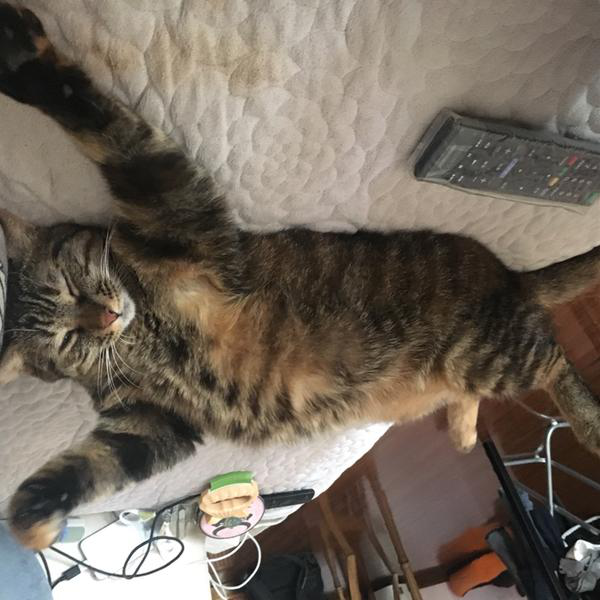

In [27]:
img = Image.open(BytesIO(response.content))
display(img)

